In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In C:\Users\Syber-Viper\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Syber-Viper\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Syber-Viper\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [13]:
#os.system("kaggle competitions download -c blg454e-summer-2021")

In [16]:
sample_submission_loc = "blg454e-summer-2021/sampleSubmission.csv"
test0_loc = "blg454e-summer-2021/test_t0.csv"
train0_loc = "blg454e-summer-2021/train_t0.csv"
train1_loc = "blg454e-summer-2021/train_t1.csv"

In [17]:
test0_data = pd.read_csv(test0_loc)
train0_data = pd.read_csv(train0_loc)
train1_data = pd.read_csv(train1_loc)

In [19]:
def draw_scatter(data, x_range, y_range):
    fig, axs = plt.subplots(x_range, y_range)
        
    for i in range(x_range):
        for j in range(y_range):
            rand_temp = np.random.randint(0, len(data))
            axs[i, j].scatter(range(len(data[data.columns[rand_temp]])), data[data.columns[rand_temp]], c=np.random.rand(len(data[data.columns[rand_temp]])))
            axs[i, j].set_title(rand_temp)
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

In [22]:

def draw_hist(data, x_range, y_range):
    
    fig, axs = plt.subplots(x_range, y_range)
    
    for i in range(x_range):
        for j in range(y_range):
            rand_temp = np.random.randint(0, len(data))
            axs[i, j].hist(data[data.columns[rand_temp]])
            axs[i, j].set_title(rand_temp)
            
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        

In [25]:
def draw_corr(data):
    plt.matshow(data.corr())
    plt.show()

In [28]:
def scatter_hist_helper(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    
def scatter_hist(data, f_1, f_2):
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005
    
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    
    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    
    # use the previously defined function
    scatter_hist_helper(data[data.columns[f_1]], data[data.columns[f_2]], ax, ax_histx, ax_histy)
    
    plt.show()

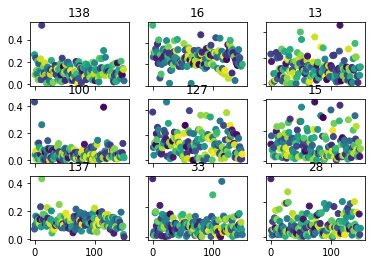

In [27]:
draw_scatter(train0_data, 3, 3)

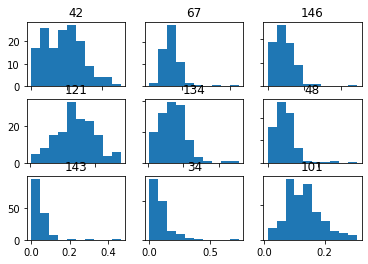

In [24]:
draw_hist(train0_data, 3, 3)

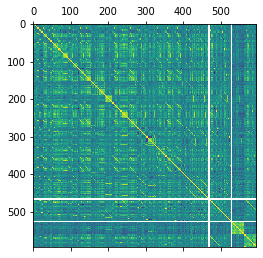

In [26]:
draw_corr(train0_data)

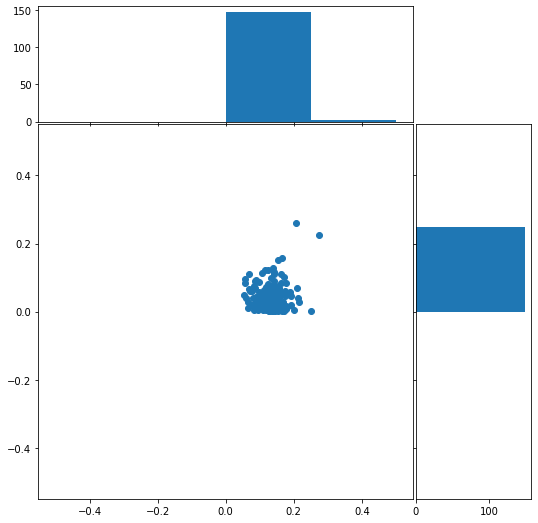

In [29]:
scatter_hist(train0_data, 10, 120)